In [30]:
!pip install tensorflow
import numpy as np 
import pandas as pd 


In [31]:
import PIL #python image library used for image operations
import tensorflow as tf  # deeplearning for neural networks
import matplotlib.pyplot as plt 



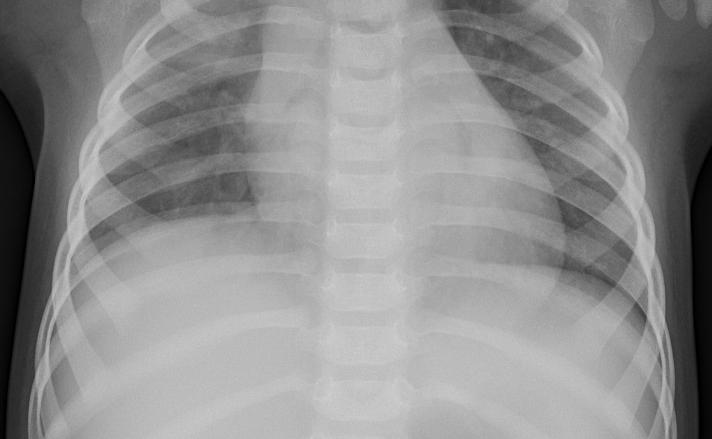

In [32]:
image = PIL.Image.open(r"C:\Users\Ravikrishna J\OneDrive\Desktop\Documents\sign language\data\chest_xray\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg")
#Note the r before the opening quote. This makes the string a raw string literal, which is useful for Windows file paths to avoid issues with escape characters.
image

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator is used to split the data into 3 types
#training, validation, and test sets

In [43]:
train_dir=r"C:\Users\Ravikrishna J\OneDrive\Desktop\Documents\sign language\data\chest_xray\chest_xray\train"
train_generator=ImageDataGenerator(rescale=1/225)
"""This rescaling is applied to normalize pixel values. 
Neural networks often work better with input data that is in a small, normalized range. 
Dividing by 255 scales the pixel values to be between 0 and 1."""
data_train=train_generator.flow_from_directory(train_dir,target_size=(120,120),batch_size=8,class_mode="binary")
"""is a convenient way to organize and process your image dataset for training a neural network.
It takes care of loading images, resizing them, creating batches, and even applying data augmentation, 
making it easier to train a model on your image data.
"""

Found 5216 images belonging to 2 classes.


'is a convenient way to organize and process your image dataset for training a neural network.\nIt takes care of loading images, resizing them, creating batches, and even applying data augmentation, \nmaking it easier to train a model on your image data.\n'

In [44]:
val_dir=r"C:\Users\Ravikrishna J\OneDrive\Desktop\Documents\sign language\data\chest_xray\val"
val_generator=ImageDataGenerator(rescale=1/225)

data_valid=val_generator.flow_from_directory(val_dir,target_size=(120,120),batch_size=8,class_mode="binary")


Found 16 images belonging to 2 classes.


In [45]:
test_dir=r"C:\Users\Ravikrishna J\OneDrive\Desktop\Documents\sign language\data\chest_xray\test"
test_generator=ImageDataGenerator(rescale=1/225)

data_test=test_generator.flow_from_directory(test_dir,target_size=(120,120),batch_size=8,class_mode="binary")

Found 624 images belonging to 2 classes.


In [53]:
#CNN
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1,activation="sigmoid")
                            ])


In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 118, 118, 32)      34592     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 28, 28, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 128)      

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["acc"])


In [55]:
history = model.fit_generator(data_train, epochs=2, validation_data=data_valid)


C:\Users\Ravikrishna J\AppData\Local\Temp\ipykernel_7244\3227875826.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train, epochs=2, validation_data=data_valid)


Epoch 1/2
652/652 [==============================] - 327s 498ms/step - loss: 0.4654 - acc: 0.8014 - val_loss: 1.8723 - val_acc: 0.6250
Epoch 2/2
652/652 [==============================] - 138s 212ms/step - loss: 0.1841 - acc: 0.9283 - val_loss: 0.5237 - val_acc: 0.7500


In [56]:
model.evaluate(data_test)

78/78 [==============================] - 29s 371ms/step - loss: 0.5386 - acc: 0.7772


[0.5386249423027039, 0.7772436141967773]

In [57]:
predictions=model.predict(data_test)

78/78 [==============================] - 11s 141ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


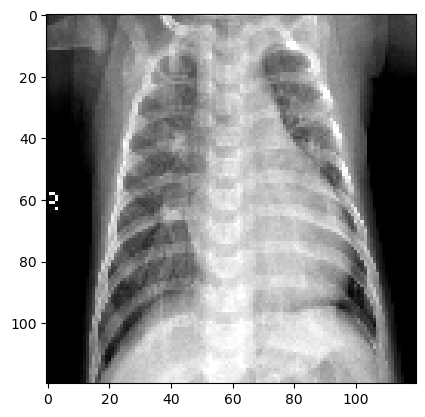

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The probability of pneumonia is: [0.97993]


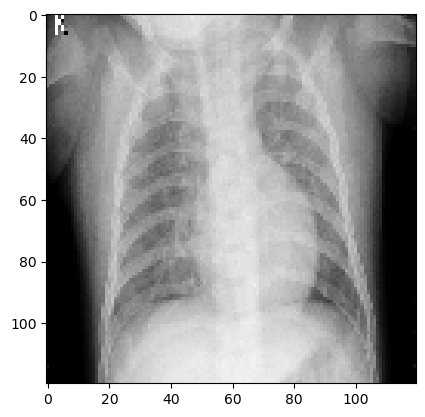

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The probability of pneumonia is: [0.23940499]


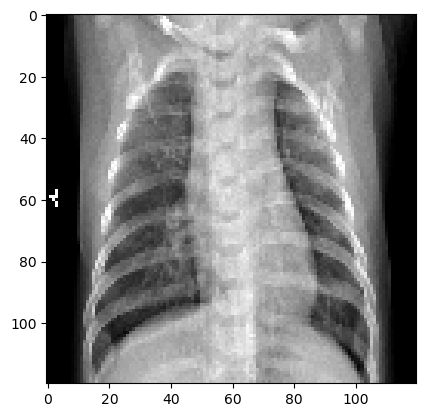

The probability of pneumonia is: [0.99938256]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


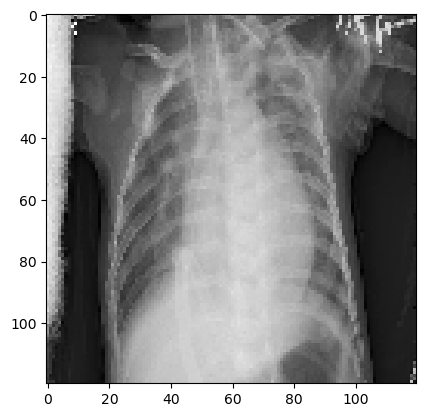

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The probability of pneumonia is: [0.6490302]


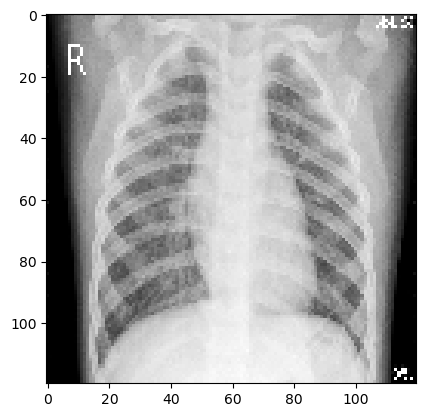

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The probability of pneumonia is: [0.94483]


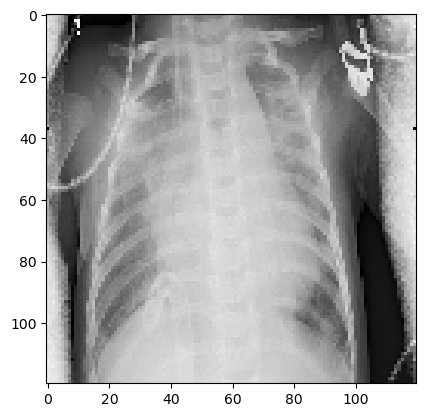

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The probability of pneumonia is: [0.52377707]


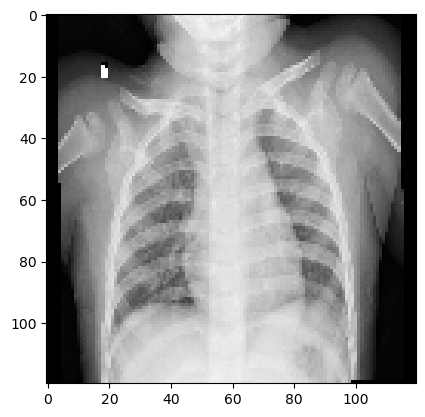

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The probability of pneumonia is: [0.9999328]


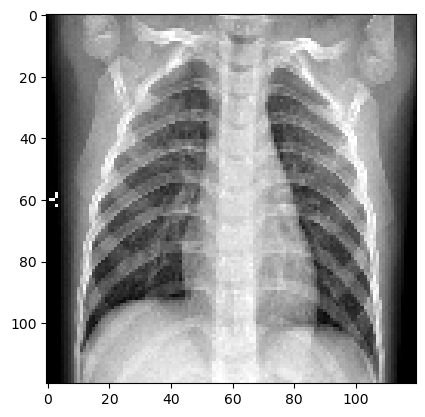

The probability of pneumonia is: [0.9967267]


In [59]:
x=data_test.next()
for i in range(0,1):
    image=x[i]
    for j in range(0,8):
        plt.imshow(image[j])
        plt.show()
        print("The probability of pneumonia is:",predictions[j])